# Support Vector Machines

In [60]:
# Third-Party Packages
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.datasets.samples_generator import make_blobs, make_circles
from sklearn.svm import SVC

In [61]:
# Matplotlib Default Configuration
mpl.rc('axes', titlesize=8)
mpl.rc('grid', linestyle=':')

In [62]:
# Constants
FIG_WIDTH, FIG_HEIGHT = 11, 4

## Hyperplanes

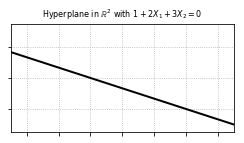

In [34]:
fig, ax = plt.subplots(figsize=(FIG_HEIGHT, FIG_HEIGHT / 2))

hyperplane = lambda x: (-1 - 2 * x) / 3
X = np.linspace(-1.75, 1.75, 100)
y = hyperplane(X)

ax.plot(X, y, linewidth=2, c='k')

ax.set_title('Hyperplane in $\\mathbb{R}^2$ with $1 + 2X_1 + 3X_2 = 0$')
ax.set_xlim(-1.75, 1.75)
ax.set_ylim(-1.75, 1.75)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid()

plt.savefig('../slides/figures/hyperplane-1.pdf', transparent=True, bbox_inches='tight', pad_inches=0)

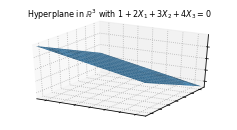

In [35]:
fig, ax = plt.subplots(figsize=(FIG_HEIGHT, FIG_HEIGHT / 2), subplot_kw={'projection': '3d'})

hyperplane = lambda x, y: (-1 - 2 * x - 3 * y) / 4
X, y = np.linspace(-1.75, 1.75, 20), np.linspace(-1.75, 1.75, 20)
xx, yy = meshgrid = np.meshgrid(X, y)
z = hyperplane(xx, yy)

ax.plot_surface(xx, yy, z)

ax.set_title('Hyperplane in $\\mathbb{R}^3$ with $1 + 2X_1 + 3X_2 + 4X_3 = 0$')
ax.set_xlim(-1.75, 1.75)
ax.set_ylim(-1.75, 1.75)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

plt.savefig('../slides/figures/hyperplane-2.pdf', transparent=True, bbox_inches='tight', pad_inches=0)

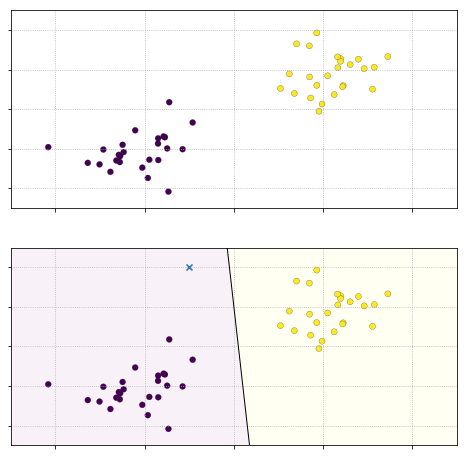

In [39]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

X, y = make_blobs(n_samples=50, centers=[[11, 11], [12, 12]], random_state=1909, cluster_std=0.2)

ax1.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', linewidth=0.2)

ax1.set_xlim(10.25, 12.75)
ax1.set_ylim(10.25, 12.75)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.grid()

hyperplane = lambda x: (242 - 20 * x)
xx = np.linspace(10.25, 12.75, 100)
yy = hyperplane(xx)

ax2.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', linewidth=0.2)
ax2.scatter(11.25, 12.5, marker='x')
ax2.plot(xx, yy, linewidth=1, c='k')
ax2.fill_between(xx, yy, 12.75, alpha=0.05, facecolor='yellow')
ax2.fill_between(xx, 10.25, yy, alpha=0.05, facecolor='purple')

ax2.set_xlim(10.25, 12.75)
ax2.set_ylim(10.25, 12.75)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.grid()

plt.savefig('../slides/figures/hyperplane-seperating.pdf', transparent=True, bbox_inches='tight', pad_inches=0)

## Maximal Margin Classifier

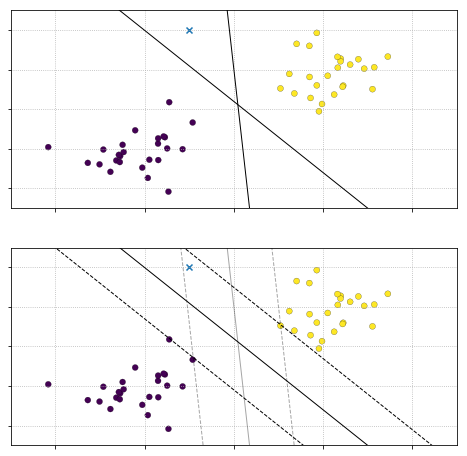

In [49]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

x_hyp1 = np.linspace(10.25, 12.75, 100)
hyperplane1 = lambda x: (242 - 20 * x)
y_hyp1 = hyperplane1(x_hyp1)

x_hyp2 = np.linspace(10.25, 12.75, 100)
hyperplane2 = lambda x: (1605 - 90 * x) / 50
y_hyp2 = hyperplane2(x_hyp2)

ax1.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', linewidth=0.2)
ax1.scatter(11.25, 12.5, marker='x')
ax1.plot(x_hyp1, y_hyp1, linewidth=1, c='k', linestyle='-')
ax1.plot(x_hyp2 + 0.11, y_hyp2, linewidth=1, c='k', linestyle='-')

ax1.set_xlim(10.25, 12.75)
ax1.set_ylim(10.25, 12.75)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.grid()

ax2.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', linewidth=0.2)
ax2.scatter(11.25, 12.5, marker='x')
ax2.plot(x_hyp1, y_hyp1, linewidth=1, c='k', linestyle='-', alpha=0.35)
ax2.plot(x_hyp1 + 0.25, y_hyp1, linewidth=1, c='k', linestyle='--', alpha=0.35)
ax2.plot(x_hyp1 - 0.26, y_hyp1, linewidth=1, c='k', linestyle='--', alpha=0.35)
ax2.plot(x_hyp2 + 0.11, y_hyp2, linewidth=1, c='k', linestyle='-')
ax2.plot(x_hyp2 - 0.25, y_hyp2, linewidth=1, c='k', linestyle='--', alpha=1)
ax2.plot(x_hyp2 + 0.47, y_hyp2, linewidth=1, c='k', linestyle='--', alpha=1)

ax2.set_xlim(10.25, 12.75)
ax2.set_ylim(10.25, 12.75)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.grid()

plt.savefig('../slides/figures/maximal-margin-hyperplane.pdf', transparent=True, bbox_inches='tight', pad_inches=0)

## Margin Classifiers

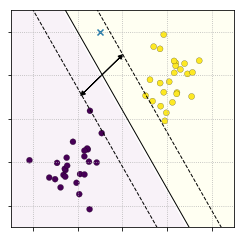

In [53]:
fig, ax = plt.subplots(figsize=(FIG_HEIGHT, FIG_HEIGHT))

ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', linewidth=0.2)
ax.scatter(11.25, 12.5, marker='x')
ax.plot(x_hyp2 + 0.11, y_hyp2, linewidth=1, c='k', linestyle='-')
ax.plot(x_hyp2 - 0.25, y_hyp2, linewidth=1, c='k', linestyle='--', alpha=1)
ax.plot(x_hyp2 + 0.47, y_hyp2, linewidth=1, c='k', linestyle='--', alpha=1)
ax.arrow(11.27, 12, 0.2, 0.2, head_width=0.05, head_length=0.05, fc='k', ec='k')
ax.arrow(11.27, 12, -0.2, -0.2, head_width=0.05, head_length=0.05, fc='k', ec='k')
ax.fill_between(x_hyp2 + 0.11, y_hyp2, 12.75, alpha=0.05, facecolor='yellow')
ax.fill_between(x_hyp2, 10.25, y_hyp2 + 0.15, alpha=0.05, facecolor='purple')

ax.set_xlim(10.25, 12.75)
ax.set_ylim(10.25, 12.75)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid()

plt.savefig('../slides/figures/maximal-margin-classifier.pdf', transparent=True, bbox_inches='tight', pad_inches=0)

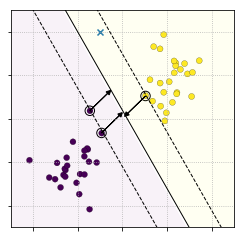

In [55]:
fig, ax = plt.subplots(figsize=(FIG_HEIGHT, FIG_HEIGHT))

ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', linewidth=0.2)
ax.scatter(11.25, 12.5, marker='x')
ax.scatter([11.136, 11.267, 11.76], [11.59, 11.335, 11.76], s=90, facecolor='none', edgecolors='k')
ax.plot(x_hyp2 + 0.11, y_hyp2, linewidth=1, c='k', linestyle='-')
ax.plot(x_hyp2 - 0.25, y_hyp2, linewidth=1, c='k', linestyle='--', alpha=1)
ax.plot(x_hyp2 + 0.47, y_hyp2, linewidth=1, c='k', linestyle='--', alpha=1)
ax.arrow(11.136, 11.59, 0.2, 0.2, head_width=0.05, head_length=0.05, fc='k', ec='k')
ax.arrow(11.267, 11.335, 0.2, 0.2, head_width=0.05, head_length=0.05, fc='k', ec='k')
ax.arrow(11.76, 11.76, -0.2, -0.2, head_width=0.05, head_length=0.05, fc='k', ec='k')
ax.fill_between(x_hyp2 + 0.11, y_hyp2, 12.75, alpha=0.05, facecolor='yellow')
ax.fill_between(x_hyp2, 10.25, y_hyp2 + 0.15, alpha=0.05, facecolor='purple')

ax.set_xlim(10.25, 12.75)
ax.set_ylim(10.25, 12.75)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid()

plt.savefig('../slides/figures/support-vectors.pdf', transparent=True, bbox_inches='tight', pad_inches=0)

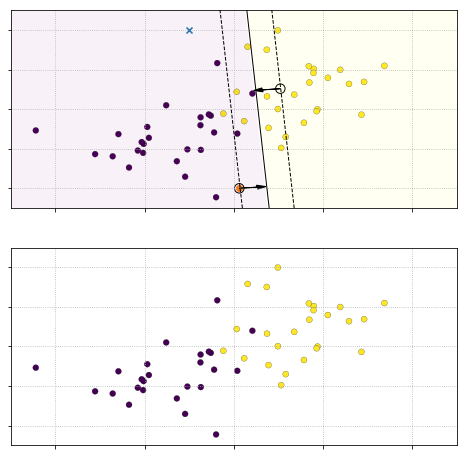

In [57]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

X, y = make_blobs(n_samples=50, centers=[[11.2, 11.2], [11.8, 11.8]], random_state=1909, cluster_std=0.3)

x_hyp1 = np.linspace(10.25, 12.75, 100)
hyperplane1 = lambda x: (242 - 20 * x)
y_hyp1 = hyperplane1(x_hyp1)

ax1.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', linewidth=0.2)
ax1.scatter(11.25, 12.5, marker='x')
ax1.scatter(11.53, 10.5, marker='o')
ax1.scatter([11.53, 11.76], [10.5, 11.76], s=90, facecolor='none', edgecolors='k')
ax1.plot(x_hyp1 + 0.11, y_hyp1, linewidth=1, c='k', linestyle='-')
ax1.plot(x_hyp1 - 0.04, y_hyp1, linewidth=1, c='k', linestyle='--', alpha=1)
ax1.plot(x_hyp1 + 0.25, y_hyp1, linewidth=1, c='k', linestyle='--', alpha=1)
ax1.arrow(11.53, 10.5, 0.1, 0.015, head_width=0.05, head_length=0.05, fc='k', ec='k')
ax1.arrow(11.76, 11.76, -0.1, -0.015, head_width=0.05, head_length=0.05, fc='k', ec='k')
ax1.fill_between(x_hyp1 + 0.11, y_hyp1, 12.75, alpha=0.05, facecolor='yellow')
ax1.fill_between(x_hyp1, 10.25, y_hyp1 + 2, alpha=0.05, facecolor='purple')

ax1.set_xlim(10.25, 12.75)
ax1.set_ylim(10.25, 12.75)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.grid()

ax2.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', linewidth=0.2)

ax2.set_xlim(10.25, 12.75)
ax2.set_ylim(10.25, 12.75)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.grid()

plt.savefig('../slides/figures/maximal-margin-classifier-problems.pdf', transparent=True, bbox_inches='tight', pad_inches=0)

## Support Vector Classifiers and Machines

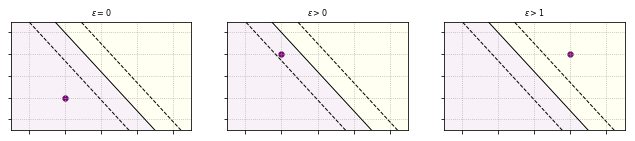

In [59]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(FIG_WIDTH, FIG_HEIGHT / 2))

x_hyp2 = np.linspace(10.25, 12.75, 100)
hyperplane2 = lambda x: (1605 - 90 * x) / 50
y_hyp2 = hyperplane2(x_hyp2)

ax1.scatter(11, 11, c='purple', edgecolor='k', linewidth=0.2)
ax1.plot(x_hyp2 + 0.11, y_hyp2, linewidth=1, c='k', linestyle='-')
ax1.plot(x_hyp2 - 0.25, y_hyp2, linewidth=1, c='k', linestyle='--', alpha=1)
ax1.plot(x_hyp2 + 0.47, y_hyp2, linewidth=1, c='k', linestyle='--', alpha=1)
ax1.fill_between(x_hyp2 + 0.11, y_hyp2, 12.75, alpha=0.05, facecolor='yellow')
ax1.fill_between(x_hyp2, 10.25, y_hyp2 + 0.15, alpha=0.05, facecolor='purple')

ax1.set_xlim(10.25, 12.75)
ax1.set_ylim(10.25, 12.75)
ax1.set_title('$\\epsilon = 0$')
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.grid()

ax2.scatter(11, 12, c='purple', edgecolor='k', linewidth=0.2)
ax2.plot(x_hyp2 + 0.11, y_hyp2, linewidth=1, c='k', linestyle='-')
ax2.plot(x_hyp2 - 0.25, y_hyp2, linewidth=1, c='k', linestyle='--', alpha=1)
ax2.plot(x_hyp2 + 0.47, y_hyp2, linewidth=1, c='k', linestyle='--', alpha=1)
ax2.fill_between(x_hyp2 + 0.11, y_hyp2, 12.75, alpha=0.05, facecolor='yellow')
ax2.fill_between(x_hyp2, 10.25, y_hyp2 + 0.15, alpha=0.05, facecolor='purple')

ax2.set_xlim(10.25, 12.75)
ax2.set_ylim(10.25, 12.75)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.set_title('$\\epsilon > 0$')
ax2.grid()

ax3.scatter(12, 12, c='purple', edgecolor='k', linewidth=0.2)
ax3.plot(x_hyp2 + 0.11, y_hyp2, linewidth=1, c='k', linestyle='-')
ax3.plot(x_hyp2 - 0.25, y_hyp2, linewidth=1, c='k', linestyle='--', alpha=1)
ax3.plot(x_hyp2 + 0.47, y_hyp2, linewidth=1, c='k', linestyle='--', alpha=1)
ax3.fill_between(x_hyp2 + 0.11, y_hyp2, 12.75, alpha=0.05, facecolor='yellow')
ax3.fill_between(x_hyp2, 10.25, y_hyp2 + 0.15, alpha=0.05, facecolor='purple')

ax3.set_xlim(10.25, 12.75)
ax3.set_ylim(10.25, 12.75)
ax3.set_xticklabels([])
ax3.set_yticklabels([])
ax3.set_title('$\\epsilon > 1$')
ax3.grid()

plt.savefig('../slides/figures/support-vector-errors.pdf', transparent=True, bbox_inches='tight', pad_inches=0)

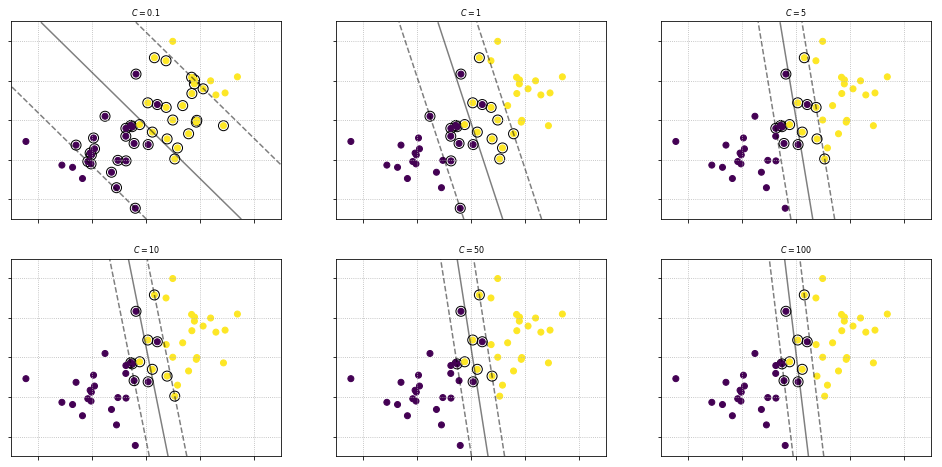

In [75]:
fig = plt.figure(figsize=(FIG_WIDTH * 1.5, FIG_HEIGHT * 2))

for idx, c in enumerate([0.1, 1, 5, 10, 50, 100]):
    X, y = make_blobs(n_samples=50, centers=[[11.2, 11.2], [11.8, 11.8]], random_state=1909, cluster_std=0.3)
    xx, yy = np.mgrid[10.25:12.75:.01, 10.25:12.75:.01]
    features = np.c_[xx.ravel(), yy.ravel()]

    clf = SVC(kernel='linear', C=c)
    clf.fit(X, y)
    P = clf.decision_function(features).reshape(xx.shape)
    
    ax = fig.add_subplot(231 + idx)
    
    ax.contour(xx, yy, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolor='none', edgecolors='k');
    ax.scatter(X[:, 0], X[:, 1], c=y)

    ax.set_xlim(10.25, 12.75)
    ax.set_ylim(10.25, 12.75)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title(f'$C={c}$')
    ax.grid()
        
plt.savefig('../slides/figures/support-vector-penalties.pdf', transparent=True, bbox_inches='tight', pad_inches=0)

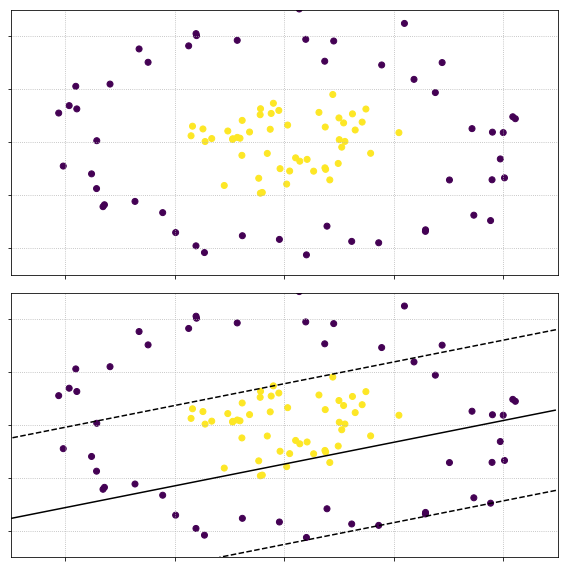

In [76]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

X, y = make_circles(100, factor=.3, noise=.1, random_state=1909)
xx, yy = np.mgrid[-1.25:1.25:.01, -1.25:1.25:.01]
features = np.c_[xx.ravel(), yy.ravel()]

clf = SVC(kernel='linear', C=10000, random_state=1909)
clf.fit(X, y)
P = clf.decision_function(features).reshape(xx.shape)

ax1.scatter(X[:, 0], X[:, 1], c=y)

ax1.set_xlim(-1.25, 1.25)
ax1.set_ylim(-1.25, 1.25)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.grid()

ax2.scatter(X[:, 0], X[:, 1], c=y)
ax2.contour(xx, yy, P, colors='k', levels=[-1, 0, 1], alpha=1, linestyles=['--', '-', '--'])

ax2.set_xlim(-1.25, 1.25)
ax2.set_ylim(-1.25, 1.25)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.grid()

plt.tight_layout()
plt.savefig('../slides/figures/support-vector-machines.pdf', transparent=True, bbox_inches='tight', pad_inches=0)

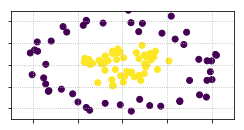

In [80]:
fig, ax = plt.subplots(figsize=(FIG_HEIGHT, FIG_HEIGHT / 2))

X, y = make_circles(100, factor=.3, noise=.1, random_state=1909)

ax.scatter(X[:, 0], X[:, 1], c=y)

ax.set_xlim(-1.25, 1.25)
ax.set_ylim(-1.25, 1.25)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid()

plt.savefig('../slides/figures/kernel-1.pdf', transparent=True, bbox_inches='tight', pad_inches=0)

/Users/sascha/.local/share/virtualenvs/laboratory-LAollfle/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


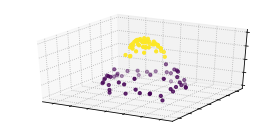

In [85]:
fig, ax = plt.subplots(figsize=(FIG_HEIGHT, FIG_HEIGHT / 2), subplot_kw={'projection': '3d'})

r = np.exp(-(X ** 2).sum(1))
xx, yy = np.mgrid[-1.25:1.25:.01, -1.25:1.25:.01]
z = np.c_[xx.ravel(), yy.ravel()]

clf = SVC(kernel='rbf', C=1, random_state=1909)
clf.fit(X, y)
P = clf.decision_function(z).reshape(xx.shape)

ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=10)

ax.set_xlim(-1.75, 1.75)
ax.set_ylim(-1.75, 1.75)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

fig.tight_layout()
plt.savefig('../slides/figures/kernel-2.pdf', transparent=True, bbox_inches='tight', pad_inches=0)

/Users/sascha/.local/share/virtualenvs/laboratory-LAollfle/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


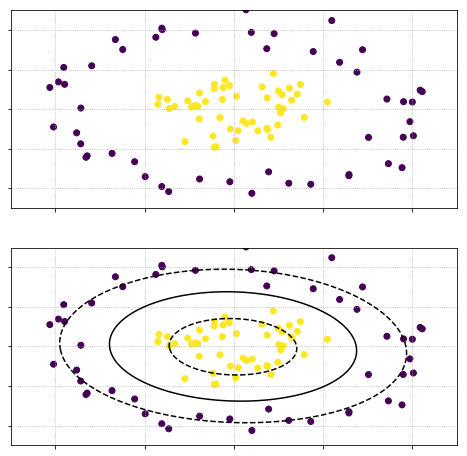

In [86]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

X, y = make_circles(100, factor=.3, noise=.1, random_state=1909)
xx, yy = np.mgrid[-1.25:1.25:.01, -1.25:1.25:.01]
z = np.c_[xx.ravel(), yy.ravel()]

clf = SVC(kernel='rbf', C=1, random_state=1909)
clf.fit(X, y)
P = clf.decision_function(z).reshape(xx.shape)

ax1.scatter(X[:, 0], X[:, 1], c=y)

ax1.set_xlim(-1.25, 1.25)
ax1.set_ylim(-1.25, 1.25)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.grid()

ax2.scatter(X[:, 0], X[:, 1], c=y)
ax2.contour(xx, yy, P, colors='k', levels=[-1, 0, 1], alpha=1, linestyles=['--', '-', '--'])

ax2.set_xlim(-1.25, 1.25)
ax2.set_ylim(-1.25, 1.25)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.grid()

plt.savefig('../slides/figures/rbf-kernel.pdf', transparent=True, bbox_inches='tight', pad_inches=0)